In [1]:
import pandas as pd

import numpy as np

C:\Users\augus\AppData\Local\Temp\ipykernel_23908\3461346634.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
merged_data=pd.read_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\dataset\combined_set.csv')
merged_data

,Sail Date.,QTY.(KGS)
0,2018-01-01,257733
1,2018-01-04,577207
2,2018-01-05,1322201
3,2018-01-06,1652038
4,2018-01-07,1548883
...,...,...
1333,2022-12-27,1029546
1334,2022-12-28,971387
1335,2022-12-29,231274
1336,2022-12-30,358590


In [3]:
# Split the data into features (X) and target variable (y)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'merged_data' is your DataFrame
# merged_data = pd.read_csv('your_file.csv')  # Read your data from a CSV file or any other source

# Convert 'Sail Date.' to datetime format
merged_data['Sail Date.'] = pd.to_datetime(merged_data['Sail Date.'])

# Extract year, month, and day as numerical features
merged_data['Year'] = merged_data['Sail Date.'].dt.year
merged_data['Month'] = merged_data['Sail Date.'].dt.month
merged_data['Day'] = merged_data['Sail Date.'].dt.day

# Drop the original 'Sail Date.' column
merged_data.drop(columns=['Sail Date.'], inplace=True)

# Split the data into features (X) and target variable (y)
X = merged_data[['Year', 'Month', 'Day']]  # Features
y = merged_data['QTY.(KGS)']                # Target variable


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X.shape




(1338, 3)

In [4]:

import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'merged_data' is your DataFrame with columns 'Year', 'Month', 'Day', and 'QTY.(KGS)'
# You can replace 'merged_data' with your actual DataFrame

# Filter data for 2018 to 2021
train_data = merged_data[(merged_data['Year'] == 2018) | (merged_data['Year'] == 2019) | (merged_data['Year'] == 2020) | (merged_data['Year'] == 2021) | (merged_data['Year'] == 2022) ]

# Filter data for 2022
test_data = merged_data[(merged_data['Year'] == 2023)]

# Split train_data into features (X_train) and target variable (y_train)
X_train = train_data[['Year', 'Month', 'Day']]
y_train = train_data['QTY.(KGS)']

# Split test_data into features (X_test) and target variable (y_test)
X_test = test_data[['Year', 'Month', 'Day']]
y_test = test_data['QTY.(KGS)']

# Optionally, you can reset the indices of the DataFrames
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1338, 3)
y_train shape: (1338,)
X_test shape: (0, 3)
y_test shape: (0,)


In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from sklearn.preprocessing import MinMaxScaler

# Assuming 'merged_data' is your DataFrame with columns 'Year', 'Month', 'Day', and 'QTY.(KGS)'
# You can replace 'merged_data' with your actual DataFrame
# merged_data = pd.read_csv('your_dataset.csv')

# Extract features (X) and target variable (y)
X = merged_data[['Year', 'Month', 'Day']].values
y = merged_data['QTY.(KGS)'].values

# Normalize features and target variable
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# Reshape features for LSTM input [samples, time steps, features]
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using all available data
model.fit(X_lstm, y_scaled, epochs=100, batch_size=32, verbose=1)

# Create a dummy dataframe for 2023
dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
data_2023 = pd.DataFrame({'Date': dates_2023})
data_2023['Year'] = data_2023['Date'].dt.year
data_2023['Month'] = data_2023['Date'].dt.month
data_2023['Day'] = data_2023['Date'].dt.day

# Predict 'QTY.(KGS)' for 2023
X_2023 = data_2023[['Year', 'Month', 'Day']].values
X_2023_scaled = scaler_X.transform(X_2023)
X_2023_lstm = X_2023_scaled.reshape(X_2023_scaled.shape[0], 1, X_2023_scaled.shape[1])

# Make predictions for 2023
y_pred_scaled = model.predict(X_2023_lstm)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# Create a DataFrame to store the predictions
predictions_df = pd.DataFrame({'Date': data_2023['Date'], 'Predicted QTY.(KGS)': y_pred.flatten()})

# Save predictions to a CSV file
predictions_df.to_csv('BISTM_2023_predictions.csv', index=False)





Epoch 1/100

42/42 [==============================] - 6s 4ms/step - loss: 0.0306
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0241
Epoch 3/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0237
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0234
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 7/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0232
Epoch 8/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0234
Epoch 9/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0233
Epoch 10/100
42/42 [==============================] - 0s 5ms/step - loss: 0.0232
Epoch 11/100
42/42 [==============================] - 0s 3ms/step - loss: 0.0233
Epoch 12/100
42/42 [==============================] - 0s 4ms/step - loss: 0.0232
Epoch 13/100
42/42 [=============

In [6]:
obt=pd.read_csv(r'C:\Users\augus\OneDrive\Desktop\js\Cargo predict\import\Code\predict\BISTM_2023_predictions.csv')

In [7]:


# Assuming 'obt' is your DataFrame containing the dataset



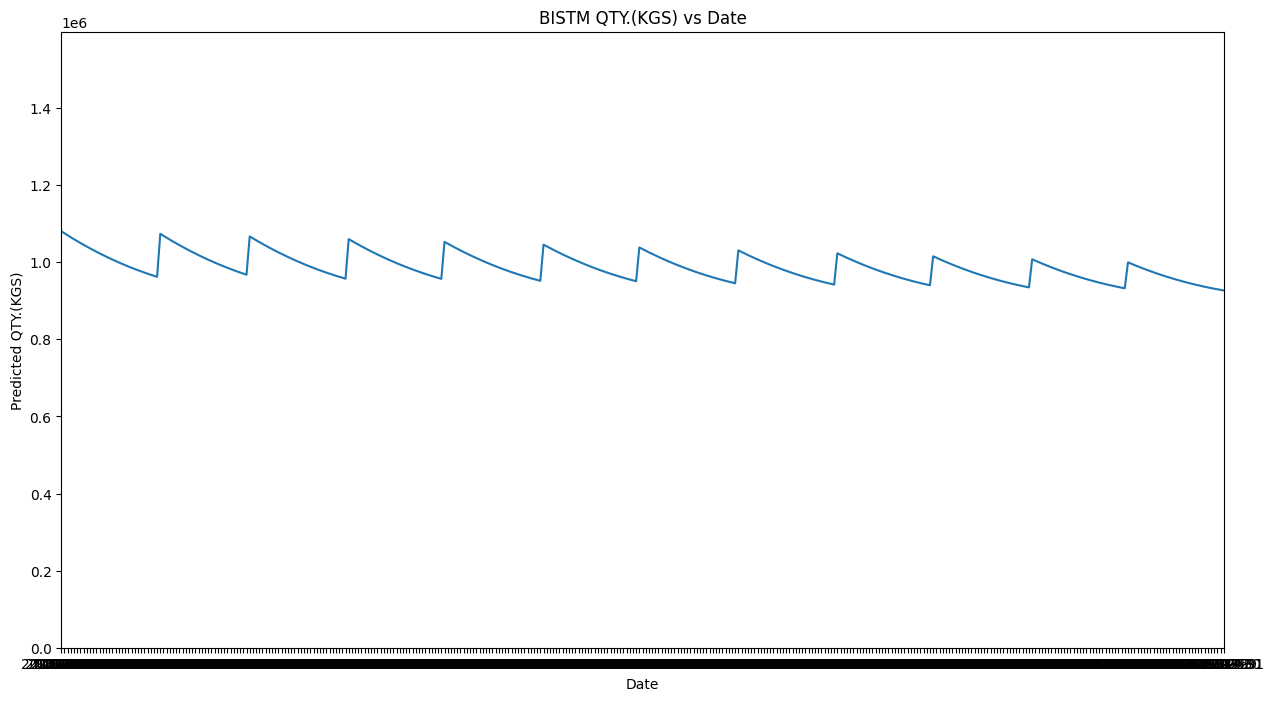

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(obt['Date'], obt['Predicted QTY.(KGS)'])
plt.xlabel('Date')
plt.ylabel('Predicted QTY.(KGS)')

plt.title('BISTM QTY.(KGS) vs Date')

plt.xlim(obt['Date'].min(), obt['Date'].max())
plt.ylim(0, 1597752.56)  
plt.show()

  Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
Using cached matplotlib-3.8.3-cp311-cp311-win_amd64.whl (7.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Python311\\Lib\\site-packages\\matplotlib\\ft2font.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [9]:
import matplotlib.pyplot as plt

